# **Question 2 : Estimating Age of Universe using Hubble's Law**

In this problem, we will use Hubble's Law on a large number of galaxies, and fit the data to a linear model to find the value of the Hubble Constant, which we will use to calculate the current age of the universe.

You can learn more about Hubble's Law, a very important principle of cosmology and expansion of Universe over here - https://simple.m.wikipedia.org/wiki/Hubble%27s_law 

Step 0: Importing libraries

Dump all the required libraries, and define any necessary constants in the code box below.

You will require the optimize module of scipy library, so be sure to include a line saying `from scipy.optimize import curve_fit`.

In [48]:
#import libraries and define constants

import pandas as pd
import numpy as np
from scipy.optimize import curve_fit as cf
import matplotlib.pyplot as plt

factor = 3
dm = 20

Step 2: Loading the data

Open the file "data.txt" and store it in array(s). First row contains the distance modulus (https://en.m.wikipedia.org/wiki/Distance_modulus) of the galaxy from earth, second row contains the line of sight velocity in km/s.

To convert distance modulus to distance in Megaparsecs (the unit we will be using in the rest of the question), use the formula:

$d = 10^{\left(\frac{d_{dist mod}}{5} - 5\right)}$

where $d$ is in megaparsecs (Mpc).

In [49]:
#Load data and convert it to useable form

file_path = r'C:\Users\91987\hello\data.txt'

hl = pd.read_csv(file_path)

hl['Distance(Mpc)'] = 10**(-5 + (hl['mod0']/5))

hl

,mod0,vgsr,Distance(Mpc)
0,36.65,15080,213.796209
1,37.29,18221,287.078058
2,33.75,3129,56.234133
3,32.66,4486,34.040819
4,33.37,4564,47.206304
...,...,...,...
4059,34.09,4843,65.765784
4060,37.62,23832,334.195040
4061,36.06,11410,162.929603
4062,35.96,9105,155.596563


Step 3: Preliminary Data Visualization

Create a function taking the distance to the galaxy, and a slope and an intercept parameter as input, returning recession velocity of that galaxy as output. A code snippet showing how to use curve_fit to find the optimum slope and intercept is shown here - https://github.com/krittikaiitb/tutorials/blob/master/Tutorial_07/SciPy1.ipynb 

Create a scatter plot of the line of sight velocity of the galaxies (in km/s) vs the distance to the galaxies (in Mpc). Also plot the model you just fit in the same graph.

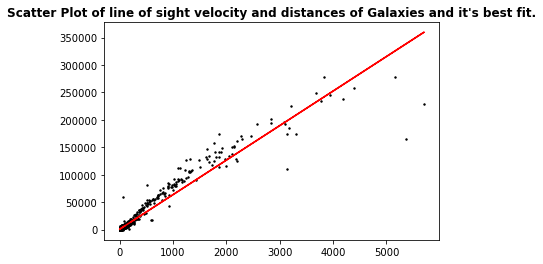

In [50]:
#Create a best fit model and plot the data

def lin_func(d,m,c):
    v = m*d + c
    return v

p_opt, p_cov = cf(lin_func,hl['Distance(Mpc)'], hl['vgsr'])

plt.plot(hl['Distance(Mpc)'],lin_func(hl['Distance(Mpc)'],*p_opt),label='Best Fit',color='r')

plt.scatter(hl['Distance(Mpc)'],hl['vgsr'],s=2, color = 'black')

plt.title("Scatter Plot of line of sight velocity and distances of Galaxies and it's best fit.",fontweight ="bold")

plt.show()

Step 4: Removing Outliers (OPTIONAL)

As you can see, there are many points on the outskirts of the graph, which may affect out calulations of the slope and intercept unduly. Devise a way to remove those outliers to your satisfaction, and replot the remaining data points. There are multiple ways to do this, a few of them could be:

1. Removing all points whose distances are 3$\times$(Standard Deviation of Distance from Earth) away from the Mean Distance of all input galaxies from Earth. (or take any factor other than 3)

2. Removing all points which are a certain distance away from the best fit line initially calculated (decide yourself what to set this distance as, could be a factor of the mean distance from the line for all points).

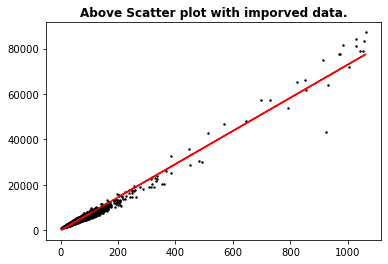

In [51]:
#Remove outliers and replot the improved data

mu = hl['Distance(Mpc)'].mean(axis = 0)
SD = hl['Distance(Mpc)'].std(axis = 0)       
        
hl.drop(hl[(hl['Distance(Mpc)'] > mu + factor * SD) | (hl['Distance(Mpc)'] < mu - factor * SD)].index, inplace=True)

hl.drop(hl[(hl['vgsr'] > (p_opt[0] + dm)*hl['Distance(Mpc)'] + p_opt[1]) | (hl['vgsr'] < (p_opt[0] - dm)*hl['Distance(Mpc)'] + p_opt[1])].index, inplace=True)

p_opt0, p_cov0 = cf(lin_func,hl['Distance(Mpc)'], hl['vgsr'])

plt.plot(hl['Distance(Mpc)'],lin_func(hl['Distance(Mpc)'],*p_opt0),label='Best Fit',color='r')

plt.scatter(hl['Distance(Mpc)'],hl['vgsr'],s=2, color = 'black')
plt.title("Above Scatter plot with imporved data.",fontweight ="bold")

plt.show()

Step 5: Conclusion

The slope of the graph (with recessional velocity in the y-axis and distance of the galaxy in the x-axis) gives us the Hubble Constant $H_0$ (in units km/s-Mpc). The reciprocal of the Hubble Constant is a good approximation for the age of the universe. Hence, find the age of the universe using your calculations.

In [53]:
#Solution code

H_o = p_opt0[0]

print("The Hubble Constant is", H_o, "km/s-Mpc")
print("Age Of Our Universe is", 1000/H_o, "Billion Years.")

The Hubble Constant is 73.08270916821999 km/s-Mpc
Age Of Our Universe is 13.683127122425422 Billion Years.
